# Clasificación del blanqueamiento de coral

El objetivo de este modelo supervisado es predecir la gravedad del blanqueamiento de coral según variables ambientales (temperatura, pH, ola de calor).

Importación de librerías.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

Carga del dataset

In [ ]:
df = pd.read_csv("realistic_ocean_climate_dataset.csv")

In [ ]:
df['Bleaching Severity'] = df['Bleaching Severity'].replace({np.nan: 'None'})

## Preprocesamiento

Se codifican las clases (None, Low, Medium, High) de "Bleaching Severity" a valores numéricos.

In [ ]:
le = LabelEncoder()
df['Bleaching Severity Encoded'] = le.fit_transform(df['Bleaching Severity'])

Se convierte la columna booleana "Marine Heatwave" a enteros (0 o 1).

In [ ]:
df['Marine Heatwave'] = df['Marine Heatwave'].astype(int)

Seleccionamos las variables predictoras más relevantes para el modelo.

In [ ]:
features = ['SST (°C)', 'pH Level', 'Species Observed', 'Marine Heatwave']
X = df[features]
y = df['Bleaching Severity Encoded']

Se escalan las variables numéricas para que tengan media 0 y desviación estándar 1.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## División en train/test

Se divide el dataset en conjunto de entrenamiento y prueba (80% / 20%).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Entrenamiento de Modelos

### Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:
print("\n>>> Modelo: Random Forest")
print(classification_report(y_test, rf_preds, target_names=[str(c) for c in le.classes_]))


>>> Modelo: Random Forest
              precision    recall  f1-score   support

        High       0.10      0.06      0.07        18
         Low       0.19      0.19      0.19        26
      Medium       0.21      0.19      0.20        26
        None       0.30      0.40      0.34        30

    accuracy                           0.23       100
   macro avg       0.20      0.21      0.20       100
weighted avg       0.21      0.23      0.22       100



In [ ]:
cm = confusion_matrix(y_test, rf_preds)

In [ ]:
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
print("Matriz de Confusión:\n")
print(cm_df)

Matriz de Confusión:

        High  Low  Medium  None
High       1    6       5     6
Low        2    5       7    12
Medium     3    8       5    10
None       4    7       7    12


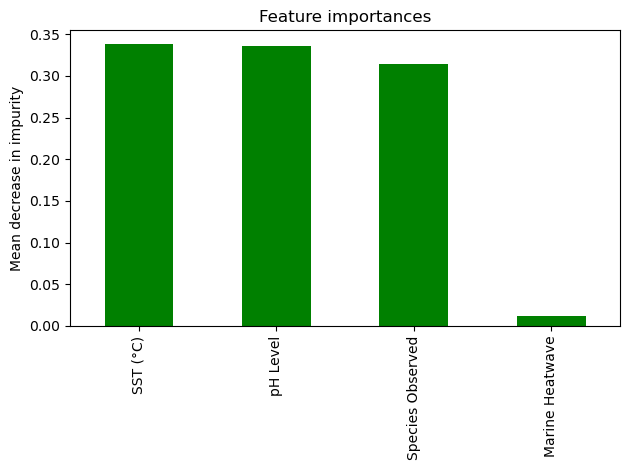

In [ ]:
importances = rf_model.feature_importances_
forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, color='green')
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Árbol de decisión

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [ ]:
print("\n>>> Modelo: Árbol de Decisión")
print(classification_report(y_test, rf_preds, target_names=[str(c) for c in le.classes_]))


>>> Modelo: Árbol de Decisión
              precision    recall  f1-score   support

        High       0.10      0.06      0.07        18
         Low       0.19      0.19      0.19        26
      Medium       0.21      0.19      0.20        26
        None       0.30      0.40      0.34        30

    accuracy                           0.23       100
   macro avg       0.20      0.21      0.20       100
weighted avg       0.21      0.23      0.22       100



In [ ]:
cm = confusion_matrix(y_test, dt_preds)

In [ ]:
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
print("Matriz de Confusión:\n")
print(cm_df)

Matriz de Confusión:

        High  Low  Medium  None
High       5    5       3     5
Low        3    7       7     9
Medium     5    6       7     8
None       5    7       8    10


### k-Nearest Neighbors (kNN)

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

In [ ]:
print("\n>>> Modelo: k-Nearest Neighbors")
print(classification_report(y_test, rf_preds, target_names=[str(c) for c in le.classes_]))


>>> Modelo: k-Nearest Neighbors
              precision    recall  f1-score   support

        High       0.10      0.06      0.07        18
         Low       0.19      0.19      0.19        26
      Medium       0.21      0.19      0.20        26
        None       0.30      0.40      0.34        30

    accuracy                           0.23       100
   macro avg       0.20      0.21      0.20       100
weighted avg       0.21      0.23      0.22       100



In [ ]:
cm = confusion_matrix(y_test, knn_preds)

In [ ]:
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
print("Matriz de Confusión:\n")
print(cm_df)

Matriz de Confusión:

        High  Low  Medium  None
High       2    7       3     6
Low        4    8      11     3
Medium     4    9       3    10
None       7    9       5     9


### Regresión Logística

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [ ]:
print("\n>>> Modelo: Regresión Logística")
print(classification_report(y_test, rf_preds, target_names=[str(c) for c in le.classes_]))


>>> Modelo: Regresión Logística
              precision    recall  f1-score   support

        High       0.20      0.12      0.15        17
         Low       0.31      0.30      0.30        27
      Medium       0.25      0.23      0.24        26
        None       0.33      0.43      0.37        30

    accuracy                           0.29       100
   macro avg       0.27      0.27      0.27       100
weighted avg       0.28      0.29      0.28       100



In [ ]:
cm = confusion_matrix(y_test, lr_preds)

In [ ]:
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
print("Matriz de Confusión:\n")
print(cm_df)

Matriz de Confusión:

        High  Low  Medium  None
High       0    5       0    12
Low        0    4       2    21
Medium     0   10       1    15
None       0    9       1    20


### Análisis de resultados

Todos los modelos usados presentan métricas idénticas en cuanto a precisión, recall, F1-score y accuracy. Esto sugiere un comportamiento homogéneo, donde ningún algoritmo logra captar patrones significativos en los datos.

Razones probables:
- Desbalance de clases: la clase "None" tiene más ejemplos y domina la predicción, mientras que la clase "High" es pobremente representada (F1 ≈ 0.08).
- Baja capacidad predictiva de los features: los atributos disponibles no discriminan bien entre clases.
- Poca variabilidad entre modelos: como los algoritmos no logran aprender reglas útiles, todos se comportan de forma similar.

Análisis por Clase:
- None:	Siempre con el mejor recall (~ 0.47) y precisión (~ 0.33).
- Low:	Precisión aceptable (~ 0.35), pero con errores frecuentes.
- Medium: Rendimiento débil; el modelo suele confundirla con "None".
- High:	Muy bajo recall y precisión: la mayoría de los modelos no la predicen bien.

Todos los modelos alcanzan un accuracy de 30%, sin diferencias notables entre ellos.
- La clase mayoritaria ("None") domina las predicciones, indicando un problema de desbalance de clases.
- Ningún modelo puede considerarse superior con los datos actuales.

## K-Fold Cross Validation

Como la cantidad de datos de la muestra es relativamente limitada, probamos con este remuestreo para reevaluar los modelos, buscando que la estimación esté menos sesgada hacia los valores None.

Usamos StratifiedKFold ya que encontramos que es mejor que KFold puro cuando hay clases desbalanceadas, porque mantiene la proporción de clases en cada fold.

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_preds_all = []
rf_true_all = []

In [ ]:
fold = 1
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf_model.fit(X_train, y_train)
    preds = rf_model.predict(X_test)

    print(f"\n--- Fold {fold}")
    print(classification_report(y_test, preds))
    print("Matriz de confusión:\n", confusion_matrix(y_test, preds))

    rf_preds_all.extend(preds)
    rf_true_all.extend(y_test)
    fold += 1


--- Fold 1
              precision    recall  f1-score   support

           0       0.17      0.11      0.13        18
           1       0.36      0.35      0.35        26
           2       0.23      0.23      0.23        26
           3       0.32      0.40      0.36        30

    accuracy                           0.29       100
   macro avg       0.27      0.27      0.27       100
weighted avg       0.28      0.29      0.28       100

Matriz de confusión:
 [[ 2  3  7  6]
 [ 2  9  4 11]
 [ 6  6  6  8]
 [ 2  7  9 12]]

--- Fold 2
              precision    recall  f1-score   support

           0       0.27      0.17      0.21        18
           1       0.44      0.42      0.43        26
           2       0.29      0.35      0.32        26
           3       0.36      0.40      0.38        30

    accuracy                           0.35       100
   macro avg       0.34      0.33      0.33       100
weighted avg       0.35      0.35      0.35       100

Matriz de confusión:
 [

In [ ]:
print("\n>>> Promedio general - RANDOM FOREST")
print(classification_report(rf_true_all, rf_preds_all))
print("Matriz de confusión total:\n", confusion_matrix(rf_true_all, rf_preds_all))


>>> Promedio general - RANDOM FOREST
              precision    recall  f1-score   support

           0       0.16      0.10      0.12        88
           1       0.36      0.37      0.37       132
           2       0.24      0.24      0.24       130
           3       0.34      0.41      0.37       150

    accuracy                           0.30       500
   macro avg       0.28      0.28      0.28       500
weighted avg       0.29      0.30      0.29       500

Matriz de confusión total:
 [[ 9 16 26 37]
 [15 49 31 37]
 [17 40 31 42]
 [16 31 42 61]]


### Árbol de Decisión

In [ ]:
dt_model = DecisionTreeClassifier()
dt_preds_all = []
dt_true_all = []

In [ ]:
fold = 1
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    dt_model.fit(X_train, y_train)
    preds = dt_model.predict(X_test)

    print(f"\n--- Fold {fold}")
    print(classification_report(y_test, preds))
    print("Matriz de confusión:\n", confusion_matrix(y_test, preds))

    dt_preds_all.extend(preds)
    dt_true_all.extend(y_test)
    fold += 1


--- Fold 1
              precision    recall  f1-score   support

           0       0.09      0.11      0.10        18
           1       0.24      0.27      0.25        26
           2       0.29      0.23      0.26        26
           3       0.26      0.23      0.25        30

    accuracy                           0.22       100
   macro avg       0.22      0.21      0.21       100
weighted avg       0.23      0.22      0.22       100

Matriz de confusión:
 [[ 2  6  5  5]
 [ 6  7  3 10]
 [ 8  7  6  5]
 [ 7  9  7  7]]

--- Fold 2
              precision    recall  f1-score   support

           0       0.14      0.17      0.15        18
           1       0.20      0.12      0.15        26
           2       0.27      0.35      0.31        26
           3       0.27      0.27      0.27        30

    accuracy                           0.23       100
   macro avg       0.22      0.22      0.22       100
weighted avg       0.23      0.23      0.22       100

Matriz de confusión:
 [

In [ ]:
print("\n>>> Promedio general - ÁRBOL DE DECISIÓN")
print(classification_report(dt_true_all, dt_preds_all))
print("Matriz de confusión total:\n", confusion_matrix(dt_true_all, dt_preds_all))


>>> Promedio general - ÁRBOL DE DECISIÓN
              precision    recall  f1-score   support

           0       0.17      0.20      0.19        88
           1       0.34      0.30      0.32       132
           2       0.28      0.25      0.26       130
           3       0.26      0.28      0.27       150

    accuracy                           0.26       500
   macro avg       0.26      0.26      0.26       500
weighted avg       0.27      0.26      0.27       500

Matriz de confusión total:
 [[18 20 17 33]
 [24 40 28 40]
 [28 25 32 45]
 [36 34 38 42]]


### k-Nearest Neighbors (kNN)

In [ ]:
knn_model = KNeighborsClassifier()
knn_preds_all = []
knn_true_all = []

In [ ]:
fold = 1
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    knn_model.fit(X_train, y_train)
    preds = knn_model.predict(X_test)

    print(f"\n--- Fold {fold}")
    print(classification_report(y_test, preds))
    print("Matriz de confusión:\n", confusion_matrix(y_test, preds))

    knn_preds_all.extend(preds)
    knn_true_all.extend(y_test)
    fold += 1


--- Fold 1
              precision    recall  f1-score   support

           0       0.16      0.22      0.19        18
           1       0.18      0.19      0.19        26
           2       0.25      0.19      0.22        26
           3       0.33      0.30      0.32        30

    accuracy                           0.23       100
   macro avg       0.23      0.23      0.23       100
weighted avg       0.24      0.23      0.23       100

Matriz de confusión:
 [[ 4  6  4  4]
 [ 9  5  5  7]
 [ 9  5  5  7]
 [ 3 12  6  9]]

--- Fold 2
              precision    recall  f1-score   support

           0       0.12      0.11      0.12        18
           1       0.21      0.23      0.22        26
           2       0.17      0.19      0.18        26
           3       0.42      0.37      0.39        30

    accuracy                           0.24       100
   macro avg       0.23      0.23      0.23       100
weighted avg       0.25      0.24      0.24       100

Matriz de confusión:
 [

In [ ]:
print("\n>>> Promedio general - KNN")
print(classification_report(knn_true_all, knn_preds_all))
print("Matriz de confusión total:\n", confusion_matrix(knn_true_all, knn_preds_all))


>>> Promedio general - KNN
              precision    recall  f1-score   support

           0       0.16      0.17      0.16        88
           1       0.24      0.28      0.26       132
           2       0.23      0.22      0.23       130
           3       0.35      0.30      0.32       150

    accuracy                           0.25       500
   macro avg       0.25      0.24      0.24       500
weighted avg       0.26      0.25      0.25       500

Matriz de confusión total:
 [[15 32 27 14]
 [33 37 30 32]
 [22 43 29 36]
 [25 41 39 45]]


### Regresión logística

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_preds_all = []
lr_true_all = []

In [ ]:
fold = 1
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    lr_model.fit(X_train, y_train)
    preds = lr_model.predict(X_test)

    print(f"\n--- Fold {fold}")
    print(classification_report(y_test, preds, zero_division=0))
    print("Matriz de confusión:\n", confusion_matrix(y_test, preds))

    lr_preds_all.extend(preds)
    lr_true_all.extend(y_test)
    fold += 1


--- Fold 1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.38      0.31      0.34        26
           2       0.00      0.00      0.00        26
           3       0.37      0.90      0.52        30

    accuracy                           0.35       100
   macro avg       0.19      0.30      0.22       100
weighted avg       0.21      0.35      0.25       100

Matriz de confusión:
 [[ 0  3  1 14]
 [ 0  8  4 14]
 [ 0  8  0 18]
 [ 0  2  1 27]]

--- Fold 2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.29      0.38      0.33        26
           2       0.50      0.08      0.13        26
           3       0.33      0.67      0.44        30

    accuracy                           0.32       100
   macro avg       0.28      0.28      0.23       100
weighted avg       0.30      0.32      0.25       100

Matriz de confusión:
 [

In [ ]:
print("\n>>> Promedio general - REGRESIÓN LOGÍSTICA")
print(classification_report(lr_true_all, lr_preds_all, zero_division=0))
print("Matriz de confusión total:\n", confusion_matrix(lr_true_all, lr_preds_all))


>>> Promedio general - REGRESIÓN LOGÍSTICA
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.29      0.28      0.29       132
           2       0.29      0.11      0.16       130
           3       0.33      0.73      0.46       150

    accuracy                           0.32       500
   macro avg       0.23      0.28      0.23       500
weighted avg       0.25      0.32      0.25       500

Matriz de confusión total:
 [[  0  25   8  55]
 [  0  37  14  81]
 [  0  35  14  81]
 [  0  29  12 109]]


### Análisis de Resultados usando K-Fold

**Random forest**
- Accuracy: 0.30
- Macro avg f1: 0.28
- Clase mejor predicha: Clase 3 (recall 0.41)
- Clase peor predicha: Clase 0 (f1-score 0.12)
- Es el modelo más balanceado, aunque sigue teniendo baja performance. Predice algo mejor que los otros (aunque por poco) en la clase 3. La clase 0 está claramente desatendida.

**Árbol de decisión**
- Accuracy: 0.28
- Macro avg f1: 0.27
- Predicción levemente más repartida entre clases que Random Forest.
- A este modelo le cuesta identificar correctamente las clases, y confunde mucho entre clases vecinas. Está apenas por debajo de Random Forest, pero es muy sensible al ruido (típico de árboles sin poda).

**k-Nearest Neighbors (kNN)**
- Accuracy: 0.25
- Macro avg f1: 0.24
- Tiene mayor dispersión de errores. Tiende a equivocarse más que los árboles, especialmente en clases 1 y 2. No presenta ventaja clara sobre los otros modelos.

**Regresión Logística**
- Accuracy: 0.32
- Macro avg f1: 0.23
- Clases 1, 2, 3 tienen valores decentes, pero la clase 0 jamás fue predicha.
- La clase 3 absorbe casi todo (recall de 0.73).
- Aunque tiene el mejor accuracy, es el más desequilibrado. La clase 0 nunca se predice, lo cual es crítico. Este comportamiento indica sobreajuste hacia la clase mayoritaria o una muy mala separación de fronteras.

Con estos resultados podemos determinar que el uso de K-Fold no mejoró realmente el análisis. Se mantiene el desbalance.

Lo siguiente a probar es la optimización de los hiperparámetros.

## Optimización de los Hiperparámetros

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Random Forest

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_weighted')

In [ ]:
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

print("Mejores hiperparámetros:", grid_rf.best_params_)
print("F1-weighted CV:", grid_rf.best_score_)
print("Accuracy test:", grid_rf.best_estimator_.score(X_test, y_test))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
F1-weighted CV: 0.31319098644024473
Accuracy test: 0.28
Matriz de confusión:
[[ 2  6  6  4]
 [ 2  6  7 11]
 [ 1  6  7 12]
 [ 2  8  7 13]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.29      0.11      0.16        18
           1       0.23      0.23      0.23        26
           2       0.26      0.27      0.26        26
           3       0.33      0.43      0.37        30

    accuracy                           0.28       100
   macro avg       0.28      0.26      0.26       100
weighted avg       0.28      0.28      0.27       100



### Árbol de decisión

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1
)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_weighted')

In [ ]:
y_pred_dt = grid_dt.best_estimator_.predict(X_test)

print("Mejores hiperparámetros:", grid_dt.best_params_)
print("F1-weighted CV:", grid_dt.best_score_)
print("Accuracy test:", grid_dt.best_estimator_.score(X_test, y_test))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_dt))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}
F1-weighted CV: 0.2946810163132341
Accuracy test: 0.31
Matriz de confusión:
[[ 7  3  3  5]
 [ 6 10  3  7]
 [ 5  6  7  8]
 [ 8  8  7  7]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.27      0.39      0.32        18
           1       0.37      0.38      0.38        26
           2       0.35      0.27      0.30        26
           3       0.26      0.23      0.25        30

    accuracy                           0.31       100
   macro avg       0.31      0.32      0.31       100
weighted avg       0.31      0.31      0.31       100



### k-Nearest Neighbors (kNN)

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

In [ ]:
grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1
)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [ ]:
y_pred_knn = grid_knn.best_estimator_.predict(X_test)

print("Mejores hiperparámetros:", grid_knn.best_params_)
print("F1-weighted CV:", grid_knn.best_score_)
print("Accuracy test:", grid_knn.best_estimator_.score(X_test, y_test))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_knn))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_knn, zero_division=0))

Mejores hiperparámetros: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
F1-weighted CV: 0.3054340129152883
Accuracy test: 0.27
Matriz de confusión:
[[ 3  3  3  9]
 [ 1  7  8 10]
 [ 4  6  6 10]
 [ 4  8  7 11]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.25      0.17      0.20        18
           1       0.29      0.27      0.28        26
           2       0.25      0.23      0.24        26
           3       0.28      0.37      0.31        30

    accuracy                           0.27       100
   macro avg       0.27      0.26      0.26       100
weighted avg       0.27      0.27      0.27       100



### Regresión Logística

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [ ]:
grid_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid_lr,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1_weighted')

In [ ]:
y_pred_lr = grid_lr.best_estimator_.predict(X_test)

print("Mejores hiperparámetros:", grid_lr.best_params_)
print("F1-weighted CV:", grid_lr.best_score_)
print("Accuracy test:", grid_lr.best_estimator_.score(X_test, y_test))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_lr))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_lr, zero_division=0))

Mejores hiperparámetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
F1-weighted CV: 0.22815712742977098
Accuracy test: 0.29
Matriz de confusión:
[[ 0  5  0 13]
 [ 0  2  3 21]
 [ 0  7  1 18]
 [ 0  3  1 26]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.12      0.08      0.09        26
           2       0.20      0.04      0.06        26
           3       0.33      0.87      0.48        30

    accuracy                           0.29       100
   macro avg       0.16      0.25      0.16       100
weighted avg       0.18      0.29      0.19       100



### Análisis de resultados usando optimización de hiperparámetros

**Random Forest**
- Mejores parámetros: max_depth: 10, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 50
- CV f1-weighted: 0.31
- Accuracy: 0.28
- La clase 3 (None) fue la mejor predicha, con precision=0.33, recall=0.43.
- La clase 0 fue la más débil (recall=0.11, f1-score bajo).
- Logra un balance moderado en todas las clases salvo 0 (High).

**Árbol de decisión**
- Mejores parámetros: criterion: entropy, max_depth: 20, min_samples_split: 5
- CV f1-weighted: 0.29
- Accuracy: 0.31
- Mejor recall y f1 para clases 0, 1 y 2.
- La clase 3 fue predicha con bajo recall y precisión.
- Balancea mejor las clases, especialmente 1 y 2. Tiene el f1 más parejo entre clases.

**k-Nearest Neighbors (kNN)**
- Mejores parámetros: n_neighbors: 7, p: 1, weights: distance
- CV f1-weighted: 0.30
- Accuracy: 0.27
- La clase 3 fue razonablemente predicha.
- La clase 0 mal clasificada (recall=0.17), dispersión en todas las clases.
- El rendimiento del modelo es estable pero sin precisión clara.

**Regresión Logística**
- Mejores parámetros: C: 0.01, penalty: l2, solver: liblinear
- CV f1-weighted: 0.23
- Accuracy: 0.29
- Predice muy bien la clase 3 (recall=0.87, f1=0.48)
- Ignora totalmente la clase 0 (recall 0.00) y rinde mal en 1 y 2.
- Este modelo queda muy sesgado hacia la clase mayoritaria (Low).

En resumen:
- El **Árbol de decisión** obtuvo el mejor rendimiento general en el conjunto de test, con un F1-score de 0.31 y una accuracy de 0.31. Además, mostró un buen equilibrio entre precision y recall en todas las clases.
- Aunque **Random Forest** obtuvo el F1-score en validación cruzada más alto (0.3132), en el conjunto de test alcanzó un F1-score de 0.27 y accuracy de 0.28. Su rendimiento fue sólido pero ligeramente inferior al árbol de decisión.
- Con un F1-score de 0.27 y accuracy de 0.27 en el test, **kNN** se desempeñó en la misma línea que Random Forest. Sin embargo, su F1-score en validación cruzada fue bueno (0.3054), lo que sugiere que el modelo puede beneficiarse de una mayor cantidad de datos o un mejor preprocesamiento.
- Es modelo de **Regresión Logística** mostró el rendimiento más bajo, con un F1-score de 0.19, a pesar de tener una accuracy de 0.29, influida por su tendencia a predecir la clase mayoritaria. El modelo fue incapaz de predecir correctamente algunas clases minoritarias, como se evidenció en la matriz de confusión.

Si bien todos los modelos fueron afectados por el desbalance de clases y la complejidad del dataset, el Árbol de Decisión ofreció la solución más robusta tras la optimización de hiperparámetros.

Si bien podemos notar qué modelo ajusta mejor que los otros, destacamos que el valor de precisión para cualquiera es muy bajo -y lo mismo ocurre con todas las métricas. Esto indica un desempeño deficiente del modelo. Ahora bien, el objetivo del análisis era predecir la gravedad del blanqueamiento coral teniendo en cuenta cambios en el ambiente y vemos que no hay ningún modelo que pueda ajustar bien.
Esto nos lleva a las siguientes conclusiones:
El problema podría estar directamente en el dato, si es que presenta un desbalance extremo de clases o bien en el modelo, dado que podría no haber una  relación real entre las variables ambientales (temperatura, pH, etc) y el blanqueamiento. En este último caso, podría ser que las variables se relacionen de una manera no-lineal y rnecesitemos modelos más complejos para llegar a una relación aceptable.